                                Air Quality Index (AQI) Forecasting Model Using Machine Learning
Objectives:-
 
1. To provide users with accurate AQI predictions and highlight areas with highest and lowest pollution leve2. ls
2. To provide authorities and environmental agencies with a tool to forecast pollution
3. To raise public awareness about air quality and its impact on health

Methodology:-

1. Data Collection and Preparation
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Model Development
5. Model Testing and Validation
6. Model Deployment

I) Importing all the Libraries required

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
import pickle
results = []

II) Inspecting the dataset

In [4]:
climate_data = pd.read_csv("Chennai_AQI_Dataset.csv")
climate_data.head()

City      Date    AQI  PM2.5    PM10     NO2     SO2    CO      O3
0  Chennai  01/01/18   93.0  51.15  100.44   77.19  106.02  0.98   88.35
1  Chennai  02/01/18  100.0  55.00  108.00   83.00  114.00  1.05   95.00
2  Chennai  03/01/18   81.0  44.55   87.48   67.23   92.34  0.85   76.95
3  Chennai  04/01/18  169.0  92.95  182.52  140.27  192.66  1.77  160.55
4  Chennai  05/01/18  153.0  84.15  165.24  126.99  174.42  1.61  145.35

In [5]:
climate_data.tail()

City      Date    AQI  PM2.5    PM10    NO2     SO2    CO     O3
2546  Chennai  27/12/24   36.0  19.80   38.88  29.88   41.04  0.38  34.20
2547  Chennai  28/12/24   55.0  30.25   59.40  45.65   62.70  0.58  52.25
2548  Chennai  29/12/24   79.0  43.45   85.32  65.57   90.06  0.83  75.05
2549  Chennai  30/12/24   96.0  52.80  103.68  79.68  109.44  1.01  91.20
2550  Chennai  31/12/24  104.0  57.20  112.32  86.32  118.56  1.09  98.80

III) Data Preprocessing and Cleaning

climate_data.drop(['Unnamed: 9', 'Unnamed: 10'], inplace=True, axis=1)

In [7]:
climate_data.head()

City      Date    AQI  PM2.5    PM10     NO2     SO2    CO      O3
0  Chennai  01/01/18   93.0  51.15  100.44   77.19  106.02  0.98   88.35
1  Chennai  02/01/18  100.0  55.00  108.00   83.00  114.00  1.05   95.00
2  Chennai  03/01/18   81.0  44.55   87.48   67.23   92.34  0.85   76.95
3  Chennai  04/01/18  169.0  92.95  182.52  140.27  192.66  1.77  160.55
4  Chennai  05/01/18  153.0  84.15  165.24  126.99  174.42  1.61  145.35

In [8]:
null_count = climate_data.isnull().sum() 
null_count

City     0
Date     0
AQI      1
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
O3       0
dtype: int64

In [9]:
filtered_data = climate_data.drop(columns=['Date', 'City'])

filtered_data.head()

AQI  PM2.5    PM10     NO2     SO2    CO      O3
0   93.0  51.15  100.44   77.19  106.02  0.98   88.35
1  100.0  55.00  108.00   83.00  114.00  1.05   95.00
2   81.0  44.55   87.48   67.23   92.34  0.85   76.95
3  169.0  92.95  182.52  140.27  192.66  1.77  160.55
4  153.0  84.15  165.24  126.99  174.42  1.61  145.35

FEATURE SELECTION

In [10]:
filtered_data.corr()['AQI'].sort_values(ascending=False)

O3       1.000000
PM10     1.000000
NO2      1.000000
AQI      1.000000
PM2.5    1.000000
SO2      1.000000
CO       0.999962
Name: AQI, dtype: float64

In [11]:
X = climate_data.drop(['Date','AQI', 'City'],axis=1)
y = climate_data['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [14]:
print("NaNs in y_train:", y_train.isna().sum())
print("Infs in y_train:", np.isinf(y_train).sum())
print("Max value in y_train:", y_train.max())
y_train.fillna(climate_data['AQI'].mean(), inplace= True)

NaNs in y_train: 1
Infs in y_train: 0
Max value in y_train: 288.0


A) XG Boost Regressor:-
1. First we create an instance of the XGBRegressor class from the XGBoost library and store it in xgb_reg. Then we train the model
2. The rounded off predicted values are stored in xgb_pred
3. Then we compute the error between the true target values(y_test) and the predicted values (xgb_pred).

In [15]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [16]:
xgb_pred = np.round(xgb_reg.predict(X_test))

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE:{mean_absolute_error(y_test, xgb_pred)}\n RMSE:{mean_squared_error(y_test, xgb_pred, squared=False)}')
print("R2 Score:", r2_score(y_test, xgb_pred))

MAE:0.078125
 RMSE:0.5863019699779287
R2 Score: 0.9997028518375444


In [18]:
results_comp = {'true_values': y_test, 'predictions':xgb_pred}
pd.DataFrame(results_comp)

true_values  predictions
785          70.0         70.0
1786         86.0         86.0
1845         72.0         72.0
1746         53.0         53.0
487          66.0         66.0
...           ...          ...
306          64.0         64.0
2058         78.0         78.0
1463         61.0         61.0
2134         69.0         69.0
664          59.0         59.0

[256 rows x 2 columns]

<Axes: xlabel='AQI', ylabel='Density'>

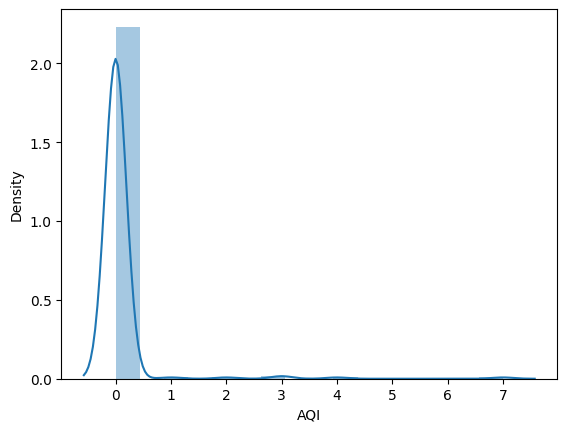

In [19]:
sns.distplot(y_test-xgb_pred)

B) Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)
rf_pred = np.round(rf_reg.predict(X_test))
print(f'MAE:{mean_absolute_error(y_test, rf_pred)}\n RMSE:{mean_squared_error(y_test, rf_pred, squared=False)}')
print("R2 Score:", r2_score(y_test, rf_pred))

MAE:0.02734375
 RMSE:0.24206145913796356
R2 Score: 0.999949349745036


In [21]:
results_comp = {'true_values': y_test, 'predictions':rf_pred}
pd.DataFrame(results_comp)

true_values  predictions
785          70.0         70.0
1786         86.0         86.0
1845         72.0         72.0
1746         53.0         53.0
487          66.0         66.0
...           ...          ...
306          64.0         64.0
2058         78.0         78.0
1463         61.0         61.0
2134         69.0         69.0
664          59.0         59.0

[256 rows x 2 columns]

<Axes: xlabel='AQI', ylabel='Density'>

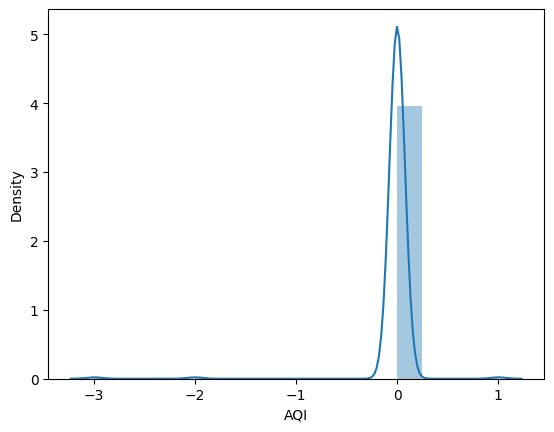

In [22]:
sns.distplot(y_test-rf_pred)

C) Linear Regressor

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, lr_pred)
rmse = mean_squared_error(y_test, lr_pred, squared=False)
r2 = r2_score(y_test, lr_pred)

print("Linear Regression")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

Linear Regression
MAE: 0.07385853035586751
RMSE: 0.09242207627919882
R2 Score: 0.999992616168394


In [24]:
sns.distplot(y_test-lr_pred)

<Axes: xlabel='AQI', ylabel='Density'>

In [25]:
results_comp = {'true_values': y_test, 'predictions':lr_pred}
pd.DataFrame(results_comp)

true_values  predictions
785          70.0    70.050050
1786         86.0    86.010894
1845         72.0    72.045155
1746         53.0    53.095399
487          66.0    66.063585
...           ...          ...
306          64.0    64.068479
2058         78.0    78.030472
1463         61.0    61.075821
2134         69.0    69.056243
664          59.0    59.080715

[256 rows x 2 columns]

D) Support Vector Regressor (SVM)

In [26]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

print("SVR")
print("MAE:", mean_absolute_error(y_test, svr_pred))
print("RMSE:", mean_squared_error(y_test, svr_pred, squared=False))
print("R2 Score:", r2_score(y_test, svr_pred))

SVR
MAE: 1.8135426905928853
RMSE: 10.866896695926206
R2 Score: 0.8979198218747617


In [27]:
results_comp = {'true_values': y_test, 'predictions':svr_pred}
pd.DataFrame(results_comp)

true_values  predictions
785          70.0    70.100198
1786         86.0    85.979781
1845         72.0    72.113859
1746         53.0    52.865827
487          66.0    66.037771
...           ...          ...
306          64.0    63.992414
2058         78.0    78.089602
1463         61.0    60.917604
2134         69.0    69.088807
664          59.0    58.872531

[256 rows x 2 columns]

In [28]:
sns.distplot(y_test-svr_pred)

<Axes: xlabel='AQI', ylabel='Density'>

E) K-Nearest Neighbor(KNN) Regressor

In [29]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("KNN Regressor")
print("MAE:", mean_absolute_error(y_test, knn_pred))
print("RMSE:", mean_squared_error(y_test, knn_pred, squared=False))
print("R2 Score:", r2_score(y_test, knn_pred))

KNN Regressor
MAE: 0.06328124999999984
RMSE: 0.27414640249326605
R2 Score: 0.9999350326062995


In [30]:
results_comp = {'true_values': y_test, 'predictions':knn_pred}
pd.DataFrame(results_comp)

true_values  predictions
785          70.0         70.0
1786         86.0         86.0
1845         72.0         72.0
1746         53.0         53.0
487          66.0         66.0
...           ...          ...
306          64.0         64.0
2058         78.0         78.0
1463         61.0         61.0
2134         69.0         69.0
664          59.0         59.0

[256 rows x 2 columns]

In [31]:
sns.distplot(y_test-knn_pred)

<Axes: xlabel='AQI', ylabel='Density'>

RESULT COMPARISON:-

Linear Regression comes out to be the best model for predicting the AQI. After that Random Forest.

MODEL SAVING:-

In [34]:

with open('RF_REG_Chennai_model.pkl', 'wb') as f:
    pickle.dump(rf_reg, f)

print("Random Forest model saved successfully.")

Random Forest model saved successfully.


In [36]:
with open('LR_Chennai_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

print("Linear Regression model saved successfully.")

Linear Regression model saved successfully.
